In [35]:
from os import listdir
from os.path import isfile, join
import csv
import numpy as np
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
mypath = "../train/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
whale_info = {}

with open("../train.csv") as file:
    t = csv.DictReader(file, delimiter=",")
   
    
    for line in t:
    
        if line["Id"] in whale_info:
            whale_info[line["Id"]] += 1
        else:
            whale_info[line["Id"]] = 1

print(len(whale_info), len(onlyfiles))

5005 25361


##### So we got 5005 unique whales that we gotta identify them using 25,361 training images

In [3]:
histogram_dict = {}

count = 1
for whale_num in whale_info.values():
    #exclude 
    if whale_num != 9664:
        histogram_dict[count] = whale_num
        count += 1 


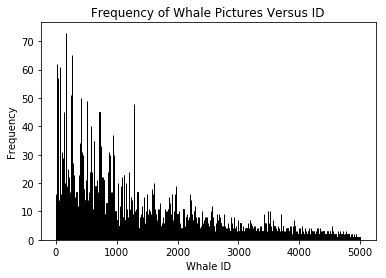

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(histogram_dict.keys(), histogram_dict.values(), ec="k", align="edge")
plt.xlabel('Whale ID')
plt.ylabel('Frequency')
plt.title('Frequency of Whale Pictures Versus ID')

plt.show()

In [18]:
mypath = "../train/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

ids_to_images = {}

with open("../train.csv") as file:
    t = csv.DictReader(file, delimiter=",")
   
    
    for line in t:
        if line["Id"] not in ids_to_images:
            ids_to_images[line["Id"]] = [line["Image"]]
        else:
            ids_to_images[line["Id"]].append(line["Image"])
        


In [50]:


train_images = []
training_ids = []

test_images = []
test_ids = []
for whale_id, pictures in ids_to_images.items():
   
    train_images.extend(pictures[:len(pictures) - len(pictures)//4])
    training_ids.extend([whale_id] * (len(pictures) - len(pictures)//4))
    test_images.extend(pictures[len(pictures) - len(pictures)//4:])
    test_ids.extend([whale_id] * (len(pictures) - len(pictures)//4))
        
    

In [62]:
len(train_images)/len(onlyfiles)

0.8244943022751469

In [58]:
encoder_dict = {}
for ids, images in zip(whale_info.keys(),ids_to_images.keys()):
    encoder_dict[images] = ids

In [59]:
b = training_ids[:]
b.extend(test_ids)
a = [encoder_dict[x] for x in b]

In [65]:
encoder = OneHotEncoder()


['w_988d0aa',
 'w_3ea05d5',
 'w_7afb40a',
 'w_b82d0eb',
 'w_1dff836',
 'w_25183b8',
 'w_9888ce0',
 'w_5089763',
 'w_18ca0f1',
 'w_4cb61b2',
 'w_c5b8268',
 'w_540ac0a',
 'w_bb443aa',
 'w_fc2726b',
 'w_11ac036',
 'w_ec7242a',
 'w_0bdb7a5',
 'w_9e6d17e',
 'w_36ceee6',
 'w_ec4b5d4',
 'w_363a5aa',
 'w_7e5b9da',
 'w_d92b4c4',
 'w_d8ae71c',
 'w_d576dff',
 'w_cd1905a',
 'w_53d3f73',
 'w_063282e',
 'w_32e705d',
 'w_f353e6a',
 'w_6cb0480',
 'w_85b3564',
 'w_5dc4f38',
 'w_f0ba4a2',
 'w_d17d229',
 'w_25b2b3d',
 'w_9d49420',
 'w_29e8496',
 'w_c0c4587',
 'w_d2d7c5d',
 'w_898f02d',
 'w_8ef82e2',
 'w_6568270',
 'w_314bc30',
 'w_eae8af4',
 'w_3e18700',
 'w_1a151e5',
 'w_2807565',
 'w_17a108a',
 'w_9f30885']

In [66]:
encoder_dict

{'w_f48451c': 'w_f48451c',
 'w_c3d896a': 'w_c3d896a',
 'w_20df2c5': 'w_20df2c5',
 'new_whale': 'new_whale',
 'w_dd88965': 'w_dd88965',
 'w_64404ac': 'w_64404ac',
 'w_a6f9d33': 'w_a6f9d33',
 'w_581ba42': 'w_581ba42',
 'w_cb622a2': 'w_cb622a2',
 'w_d3b46e7': 'w_d3b46e7',
 'w_8cad422': 'w_8cad422',
 'w_13ae3d4': 'w_13ae3d4',
 'w_3de579a': 'w_3de579a',
 'w_1d0830e': 'w_1d0830e',
 'w_2ba6978': 'w_2ba6978',
 'w_8dddbee': 'w_8dddbee',
 'w_2365d55': 'w_2365d55',
 'w_3879fa0': 'w_3879fa0',
 'w_9c506f6': 'w_9c506f6',
 'w_8a6a8d5': 'w_8a6a8d5',
 'w_662530e': 'w_662530e',
 'w_a8b34a0': 'w_a8b34a0',
 'w_c0d11da': 'w_c0d11da',
 'w_50e8d58': 'w_50e8d58',
 'w_3881f28': 'w_3881f28',
 'w_9ad3551': 'w_9ad3551',
 'w_cee684e': 'w_cee684e',
 'w_41d24c6': 'w_41d24c6',
 'w_8a235b6': 'w_8a235b6',
 'w_2e231f4': 'w_2e231f4',
 'w_6822dbc': 'w_6822dbc',
 'w_df86a42': 'w_df86a42',
 'w_700ebb4': 'w_700ebb4',
 'w_d892cd9': 'w_d892cd9',
 'w_7a4b2f9': 'w_7a4b2f9',
 'w_bc285a6': 'w_bc285a6',
 'w_c70fbcd': 'w_c70fbcd',
 